<a href="https://colab.research.google.com/github/AikyaKumar/Exercise-1-Data-Analytics-Exercise-One/blob/main/Exercise_3_Data_Analytics_Exercise_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations like arrays and matrices
import pandas as pd  # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating visualizations like plots and charts
from scipy.stats import ttest_1samp, f_oneway, norm, t # For statistical functions

from sklearn.datasets import load_iris # For loading the Iris dataset

# Load the Iris dataset as a pandas DataFrame
data = load_iris(as_frame=True)
df = data.frame
print(df.head())  # Print the first few rows of the DataFrame to inspect the data

# Calculate mean sepal length for Setosa species
species_name = 'setosa'
# Filter the DataFrame to select only rows where the species is 'setosa'
species_data = df[df['target'] == data.target_names.tolist().index(species_name)]


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
from scipy.stats import ttest_ind # Importing ttest_ind

# Selecting data for the two species
setosa_data = df[df['target'] == data.target_names.tolist().index('setosa')]
versicolor_data = df[df['target'] == data.target_names.tolist().index('versicolor')]

# Performing the independent t-test on petal length
t_statistic, p_value = ttest_ind(setosa_data['petal length (cm)'], versicolor_data['petal length (cm)'])

# Printing the results
print("T-test for Petal Length:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-test for Petal Length:
T-statistic: -39.492719391538095
P-value: 5.404910513441677e-62
Reject the null hypothesis: Sample mean is significantly different from population mean.


In [ ]:
species_data = df[df['target'] == data.target_names.tolist().index('setosa')]
sepal_length_data = species_data['sepal length (cm)']

# Population parameters (replace with known values if available)
population_mean = 5.0  # The value to test against
# If population standard deviation is unknown and n > 30, use sample standard deviation
population_std = np.std(sepal_length_data)
sample_size = len(sepal_length_data)

# Check if Z-test is appropriate
if sample_size > 30:
    # Calculate Z-statistic
    sample_mean = np.mean(sepal_length_data)
    z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

    # Print results
    print("Z-test for Sepal Length:")
    print(f"Z-statistic: {z_statistic}")
    print(f"P-value: {p_value}")

else:
    print("Sample size is too small for Z-test. Consider using a t-test instead.")

if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Z-test for Sepal Length:
Z-statistic: 0.12158410419307447
P-value: 0.9032284030976123
Fail to reject the null hypothesis: No significant difference.


In [ ]:
setosa_data = df[df['target'] == data.target_names.tolist().index('setosa')]['petal width (cm)']
versicolor_data = df[df['target'] == data.target_names.tolist().index('versicolor')]['petal width (cm)']
virginica_data = df[df['target'] == data.target_names.tolist().index('virginica')]['petal width (cm)']

# Performing the ANOVA test on petal width
f_statistic, p_value = f_oneway(setosa_data, versicolor_data, virginica_data)

# Printing the results
print("\nANOVA Test for Petal Width:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one mean petal width is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean petal widths.")


ANOVA Test for Petal Width:
F-statistic: 960.007146801809
P-value: 4.169445839443116e-85
Reject the null hypothesis: At least one mean petal width is significantly different.


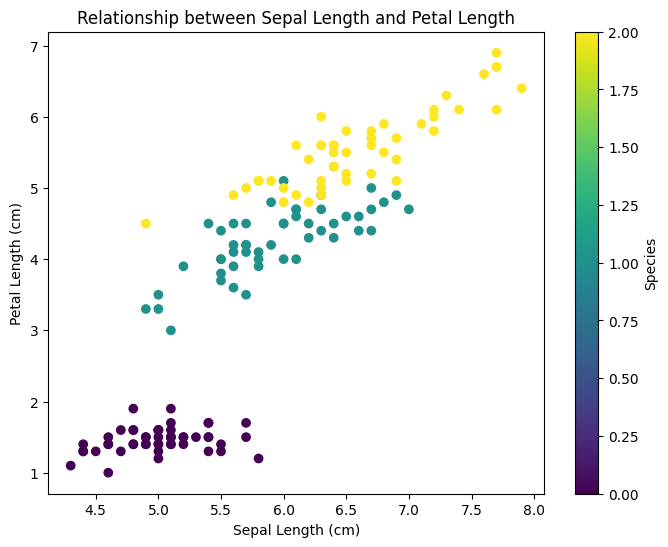

In [ ]:
# Extract sepal length and petal length
sepal_length = df['sepal length (cm)']
petal_length = df['petal length (cm)']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, petal_length, c=df['target'], cmap='viridis')  # Color by species
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Relationship between Sepal Length and Petal Length")
plt.colorbar(label='Species')  # Add a colorbar to show species
plt.show()